In [1]:
import pandas as pd
import numpy as np

## Read the collected information

**Remote Dataframes**:

In [2]:
df_remote_io = pd.read_csv('dataframes/remote-io.csv')
df_we_work_remotely = pd.read_csv('dataframes/we-work-remotely.csv')
df_stackoverflow = pd.read_csv('dataframes/stackoverflow.csv')


**Non Remote Dataframes**:

In [3]:
df_non_remote_stackoverflow = pd.read_csv('dataframes/non-remote-stackoverflow.csv')
# df_non_remote_stackoverflow
len(df_non_remote_stackoverflow["Languages"])
len(df_remote_io["Languages"])

1680

## Join REMOTE DataFrames

In [4]:
df = pd.concat([df_remote_io, df_we_work_remotely],ignore_index = True)
df = pd.concat([df, df_stackoverflow],ignore_index = True)
len(df["Languages"])

2033

## join all tech cols in single col

In [5]:
tech_cols = list(df.columns)[2:-1]

In [6]:
all_techs_df = df.copy()
all_techs_df['Technologies'] = all_techs_df[tech_cols].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)
all_techs_df = all_techs_df[['Title','Link','Technologies','Experience Level']]
all_techs_df

,Title,Link,Technologies,Experience Level
0,"Senior Systems Administrator (Washington, D.C...",https://www.remote.io/job/4048/senior-systems-...,"java,sass,c,shell, apache, mysql, aws,ios,amaz...",senior
1,Front-End Developer at Wallethub,https://www.remote.io/job/4047/front-end-devel...,"php,html,javascript,c,css, angular",other
2,Part-Time Full Stack Web Developer with React...,https://www.remote.io/job/4046/part-time-full-...,"bash,sass,html,javascript,shell,css,ruby, reac...",senior
3,Full Stack Developer (Remote United States) a...,https://www.remote.io/job/4045/full-stack-deve...,"ruby, react,ruby",other
4,Medical Biller,https://www.remote.io/job/4044/medical-biller,,other
...,...,...,...,...
2028,Senior React Native / Flutter Developer (Remote),https://stackoverflow.com/jobs/200538/senior-r...,"python,typescript,javascript, django,flask,exp...",senior
2029,Senior Software Engineer (Full Stack),https://stackoverflow.com/jobs/376694/senior-s...,"java,javascript, nosql,elasticsearch, docker,k...",senior
2030,"Senior Mobile Engineer, Flutter",https://stackoverflow.com/jobs/375400/senior-m...,"dart, flutter, ios,android",senior
2031,Sr. Software Engineer - Angular,https://stackoverflow.com/jobs/363678/sr-softw...,"python,sql, angular, docker",senior


## Dictionaries

**Dict function**:

In [7]:
def techs_to_dic(df,col_name):
    technologies_set = df[col_name]

    technologies_dict= {}

    for technologies in technologies_set:
        for technology in str(technologies).split(','):
            if technology in technologies_dict.keys():
                technologies_dict[technology] += 1
            else:
                technologies_dict[technology] =  1

    technologies_dict_sorted = {k: v for k, v in sorted(technologies_dict.items(), key=lambda item: item[1])}
    if 'nan' in technologies_dict_sorted.keys():
        technologies_dict_sorted.pop('nan')
    else:
        pass
    return technologies_dict_sorted

**All possible remote dictionaries**

In [8]:
languages_dict = techs_to_dic(df,'Languages')
frameworks_dict = techs_to_dic(df,'Web Frameworks')
libraries_dict = techs_to_dic(df,'Libraries')
databases_dict = techs_to_dic(df,'Databases')
platforms_dict = techs_to_dic(df,'Platforms')
other_dict = techs_to_dic(df,'Other')
experience_dict = techs_to_dic(df,'Experience Level')
languages_dict

{'matlab': 1,
 'vba': 1,
 'assembly': 2,
 'c++': 2,
 'dart': 4,
 'f#': 6,
 'clojure': 7,
 'elixir': 16,
 'c#': 17,
 'objective c': 24,
 'powershell': 26,
 'golang': 32,
 'kotlin': 34,
 'bash': 42,
 'r': 42,
 'swift': 51,
 'asp': 62,
 'shell': 68,
 'graphql': 84,
 'sass': 116,
 'typescript': 126,
 'php': 139,
 'ruby': 209,
 'go': 214,
 'html': 253,
 'c': 275,
 'css': 275,
 'java': 308,
 'rust': 313,
 'sql': 329,
 'scala': 346,
 'python': 382,
 'javascript': 584}

**Non remote dictionaries**:

In [9]:
non_remote_languages_dict = techs_to_dic(df_non_remote_stackoverflow,'Languages')
non_remote_frameworks_dict = techs_to_dic(df_non_remote_stackoverflow,'Web Frameworks')
non_remote_libraries_dict = techs_to_dic(df_non_remote_stackoverflow,'Libraries')
non_remote_databases_dict = techs_to_dic(df_non_remote_stackoverflow,'Databases')
non_remote_platforms_dict = techs_to_dic(df_non_remote_stackoverflow,'Platforms')
non_remote_other_dict = techs_to_dic(df_non_remote_stackoverflow,'Other')
non_remote_experience_dict = techs_to_dic(df_non_remote_stackoverflow,'Experience Level')
# non_remote_languages_dict

## List of top 5  languages

**Remote**:

In [10]:
top_5_techs = list(languages_dict.keys())[::-1][:5]
top_5_techs

['javascript', 'python', 'scala', 'sql', 'rust']

**Non Remote**:

In [11]:
non_remote_top_5_techs = list(non_remote_languages_dict.keys())[::-1][:5]
non_remote_top_5_techs

['javascript', 'java', 'python', 'c', 'php']

## Replace nan with empty string

In [12]:
df = df.replace(np.nan, '', regex=True)
df[df['Languages'].isnull()]
df.isna().sum() 

Title               0
Link                0
Languages           0
Web Frameworks      0
Libraries           0
Databases           0
Platforms           0
Other               0
Experience Level    0
dtype: int64

## Def functions : get_dummies & melt

This function:
- Takes an original df and the column to get the dummies from
- Concatenates the original df 
- Erases the column the dummies where created from

In [13]:
def get_dummies(df,col_name):
    new_df = df[col_name].str.get_dummies(sep=",")
    new_df = pd.concat([df[["Title","Link","Experience Level"]],new_df], axis=1)
    return new_df

In [14]:
def melt_df(cols_list,dummies):
    melted_df = pd.melt(dummies, id_vars = cols_list)
    melted_df = melted_df[melted_df['value'] != 0]
    del melted_df['value']
    return melted_df

## Get Dummies

In [15]:
techs_columns = list(df.columns)[2:-1]
techs_columns

['Languages', 'Web Frameworks', 'Libraries', 'Databases', 'Platforms', 'Other']

**Remote**:

In [16]:
lang_dummies = get_dummies(df,techs_columns[0])
web_dummies = get_dummies(df,techs_columns[1])
lib_dummies = get_dummies(df,techs_columns[2])
database_dummies = get_dummies(df,techs_columns[3])
platform_dummies = get_dummies(df,techs_columns[4])
other_dummies = get_dummies(df,techs_columns[5])

**Non Remote**:

In [17]:
non_remote_lang_dummies = get_dummies(df_non_remote_stackoverflow,techs_columns[0])
non_remote_web_dummies = get_dummies(df_non_remote_stackoverflow,techs_columns[1])
non_remote_lib_dummies = get_dummies(df_non_remote_stackoverflow,techs_columns[2])
non_remote_database_dummies = get_dummies(df_non_remote_stackoverflow,techs_columns[3])
non_remote_platform_dummies = get_dummies(df_non_remote_stackoverflow,techs_columns[4])
non_remote_other_dummies = get_dummies(df_non_remote_stackoverflow,techs_columns[5])

## Melted Dataframes

**Remote**:

In [18]:
melted_lang_df = melt_df(['Title',"Link","Experience Level"],lang_dummies)
melted_lang_df.columns = ['Title', 'Link',"Experience Level", techs_columns[0]]

melted_web_df = melt_df(['Title',"Link","Experience Level"],web_dummies)
melted_web_df.columns = ['Title', 'Link',"Experience Level", techs_columns[1]]

melted_lib_df = melt_df(['Title',"Link","Experience Level"],lang_dummies)
melted_lib_df.columns = ['Title', 'Link',"Experience Level", techs_columns[2]]

melted_database_df = melt_df(['Title',"Link","Experience Level"],database_dummies)
melted_database_df.columns = ['Title', 'Link',"Experience Level", techs_columns[3]]

melted_platform_df = melt_df(['Title',"Link","Experience Level"],platform_dummies)
melted_platform_df.columns = ['Title', 'Link',"Experience Level", techs_columns[4]]

melted_other_df = melt_df(['Title',"Link","Experience Level"],other_dummies)
melted_other_df.columns = ['Title', 'Link',"Experience Level", techs_columns[5]]     


**Remote all techs**:

In [19]:
melted_all_techs_df = pd.concat([melted_lang_df.rename(columns={'Languages':'Technologies'}), melted_web_df.rename(columns={'Web Frameworks':'Technologies'}), melted_lib_df.rename(columns={'Libraries':'Technologies'}), melted_platform_df.rename(columns={'Platforms':'Technologies'}), melted_other_df.rename(columns={'Other':'Technologies'})], ignore_index=True)


**Non Remote**:

In [20]:
non_remote_melted_lang_df = melt_df(['Title',"Link","Experience Level"],non_remote_lang_dummies)
non_remote_melted_lang_df.columns = ['Title', 'Link',"Experience Level", techs_columns[0]]

non_remote_melted_web_df = melt_df(['Title',"Link","Experience Level"],non_remote_web_dummies)
non_remote_melted_web_df.columns = ['Title', 'Link',"Experience Level", techs_columns[1]]

non_remote_melted_lib_df = melt_df(['Title',"Link","Experience Level"],non_remote_lang_dummies)
non_remote_melted_lib_df.columns = ['Title', 'Link',"Experience Level", techs_columns[2]]

non_remote_melted_database_df = melt_df(['Title',"Link","Experience Level"],non_remote_database_dummies)
non_remote_melted_database_df.columns = ['Title', 'Link',"Experience Level", techs_columns[3]]

non_remote_melted_platform_df = melt_df(['Title',"Link","Experience Level"],non_remote_platform_dummies)
non_remote_melted_platform_df.columns = ['Title', 'Link',"Experience Level", techs_columns[4]]

non_remote_melted_other_df = melt_df(['Title',"Link","Experience Level"],non_remote_other_dummies)
non_remote_melted_other_df.columns = ['Title', 'Link',"Experience Level", techs_columns[5]]                   

## VISUALIZATION 🙌🏼

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sb

## Top 5 techs

In [22]:
def plot_vertical_bar(col_name,df,nb_of_techs=5,color='tan'):
    top_techs = pd.DataFrame(df[col_name].value_counts())[:nb_of_techs]
    plt.bar(top_techs.index,top_techs[col_name], color =color)

    plt.show()
    
def plot_horizontal_bar(col_name,df,nb_of_techs=5,color='tan'):
    top_techs = pd.DataFrame(df[col_name].value_counts())[:nb_of_techs]
    x = top_techs.index[::-1]
    energy = top_techs[col_name][::-1]
    x_pos = [i for i, _ in enumerate(x)]
    plt.barh(x_pos, energy, color=color)
    plt.yticks(x_pos, x)

    plt.show()

### Languages

**Remote**:

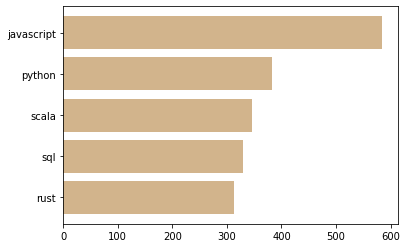

In [23]:
plot_horizontal_bar("Languages",melted_lang_df)

**Non Remote**:

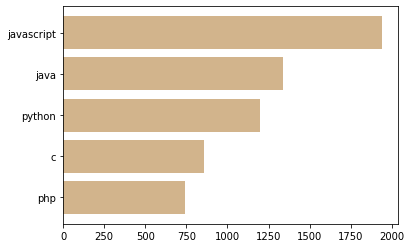

In [24]:
plot_horizontal_bar("Languages",non_remote_melted_lang_df)

### FrameWorks

**Remote**:

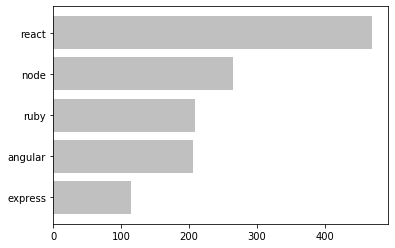

In [25]:
plot_horizontal_bar("Web Frameworks",melted_web_df,color='silver')


**Non Remote**:

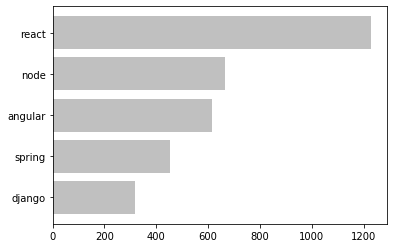

In [26]:
plot_horizontal_bar("Web Frameworks",non_remote_melted_web_df,color="silver")


### Databases

**Remote**:

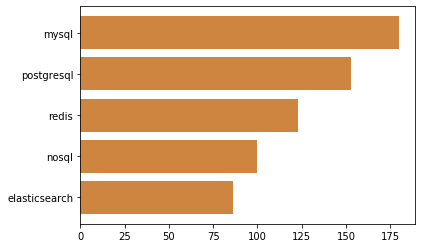

In [27]:
plot_horizontal_bar("Databases",melted_database_df,color="peru")


**Non Remote**:

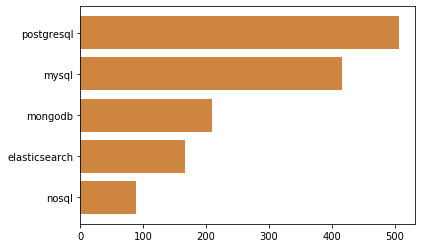

In [28]:
plot_horizontal_bar("Databases",non_remote_melted_database_df, color= "peru")


## Get specific technology related techs

In [ ]:
input_tech = input("Imput technology name:")

## All related technologies:

In [ ]:
filtered_by_tech = all_techs_df[all_techs_df['Technologies'].str.contains(input_tech)]
filtered_by_tech_dummies = get_dummies(filtered_by_tech,'Technologies')
filtered_by_tech_melted = melt_df(['Title','Link','Experience Level'],filtered_by_tech_dummies)
filtered_by_tech_melted.columns = ['Title', 'Link', 'Experience Level','Technology']

nb_of_techs = 5
top_techs = pd.DataFrame(filtered_by_tech_melted['Technology'].value_counts())[:nb_of_techs]

bar_chart = plt.bar(top_techs.index,top_techs.Technology, color ='tan')

plt.show()

## Funtion for lang piechart

In [ ]:
def data_by_techtype(df,tech_col_name,tech_user_input):
    filtered_by_tech = df[df[tech_col_name].str.contains(tech_user_input)]
    filtered_by_tech_dummies = get_dummies(filtered_by_tech,tech_col_name)
    filtered_by_tech_melted = melt_df(['Title','Link','Experience Level'],filtered_by_tech_dummies)
    filtered_by_tech_melted.columns = ['Title', 'Link', 'Experience Level','Technology']
    filtered_by_tech_melted = filtered_by_tech_melted[filtered_by_tech_melted.Technology != tech_user_input ]

    only_tech_count = filtered_by_tech_dummies[ filtered_by_tech_dummies.sum(axis = 1) == 1]
    only_tech_count = only_tech_count.shape[0]
    only_tech_count
    return {"dataframe":pd.DataFrame(filtered_by_tech_melted['Technology'].value_counts()), "only_tech_count":only_tech_count}
    
def separate_small_groups(data_by_tech):
    lang_top_techs_dic = data_by_tech["dataframe"].to_dict()
    lang_top_techs_dic = lang_top_techs_dic["Technology"]

    psum = sum(lang_top_techs_dic.values())
    pthreshold = psum * 0.075
    
    includedict = dict((k,v) for (k,v) in lang_top_techs_dic.items() if v >= pthreshold)
    others = dict((k,v) for (k,v) in lang_top_techs_dic.items() if v < pthreshold)

    others_sum = sum(others.values())
    others = {"others": others_sum}
    includedict.update(others)
    includedict.update({"only " +input_lang:lang_top_techs["only_tech_count"]})

    return includedict

def pie_chart(dictionary):
    labels = dictionary.keys()

    sizes = dictionary.values()

    colors = ['peru', 'tan', 'moccasin','orange','lightgray','pink','lightyellow']

    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

## Language input

In [ ]:
input_lang = input("Imput technology name:")

## Funtion for other techs by lang

In [ ]:
def techs_by_language(tech_category):
    filtered_by_tech = df[df["Languages"].str.contains(input_lang)]
    filtered_by_tech_dummies = get_dummies(filtered_by_tech,tech_category)
    filtered_by_tech_melted = melt_df(['Title','Link','Experience Level'],filtered_by_tech_dummies)
    filtered_by_tech_melted.columns = ['Title', 'Link', 'Experience Level','Technology']
    filtered_by_tech_melted = filtered_by_tech_melted[filtered_by_tech_melted.Technology != input_lang ]

    framework_by_lang_df = pd.DataFrame(filtered_by_tech_melted['Technology'].value_counts())

    lang_top_techs_dic = framework_by_lang_df.to_dict()
    lang_top_techs_dic = lang_top_techs_dic["Technology"]
    return lang_top_techs_dic

def techs_by_language_chart_dict(lang_top_techs_dic):
    psum = sum(lang_top_techs_dic.values())
    pthreshold = psum * 0.075
    
    includedict = dict((k,v) for (k,v) in lang_top_techs_dic.items() if v >= pthreshold)
    others = dict((k,v) for (k,v) in lang_top_techs_dic.items() if v < pthreshold)

    others_sum = sum(others.values())
    others = {"others": others_sum}
    includedict.update(others)
    return includedict
    

## Language by language chart

In [ ]:
lang_top_techs = data_by_techtype(df,"Languages",input_lang)
lang_dict = separate_small_groups(lang_top_techs)
pie_chart(lang_dict)
input_lang

## Other techs by language

**Framework**:

In [ ]:
framework_dic = techs_by_language("Web Frameworks")
framework_dic_fot_chart = techs_by_language_chart_dict(framework_dic)
pie_chart(framework_dic_fot_chart)


**Databases**:

In [ ]:
database_dic = techs_by_language("Databases")
database_dic_for_chart = techs_by_language_chart_dict(database_dic)
pie_chart(database_dic_for_chart)

In [ ]:
libraries_dic = techs_by_language("Libraries")
libraries_dic_fot_chart = techs_by_language_chart_dict(libraries_dic)
pie_chart(libraries_dic_fot_chart)

In [ ]:
platforms_dic = techs_by_language("Platforms")
platforms_dic_fot_chart = techs_by_language_chart_dict(platforms_dic)
pie_chart(platforms_dic_fot_chart)

In [ ]:
other_dic = techs_by_language("Other")
other_dic_fot_chart = techs_by_language_chart_dict(other_dic)
pie_chart(other_dic_fot_chart)

## Diferenciated by level

In [ ]:
df_by_level = all_techs_df[['Experience Level','Title']].groupby(['Experience Level']).count()

plt.bar(df_by_level.index,df_by_level.Title, color ='tan')

plt.show()

df_by_level
df_by_level.Title

In [ ]:

labels = df_by_level.index

sizes = df_by_level.Title

colors = ['peru', 'tan', 'moccasin']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Junior top 10 df

In [ ]:
junior_df = df[df['Experience Level'] == 'junior']
junior_lang_df = junior_df[['Title','Link',"Languages","Experience Level"]]


junior_df_dummies = get_dummies(junior_lang_df,'Languages')
junior_df_dummies

junior_df_melted = melt_df(['Title',"Link","Experience Level"],junior_df_dummies)
junior_df_melted

junior_top10_df = pd.DataFrame(junior_df_melted['variable'].value_counts()[:10])


plt.xticks(rotation='vertical')
plt.bar(junior_top10_df.index,junior_top10_df.variable, color ='tan')

plt.show()



## Senior techs based in junior techs

In [ ]:
junior_df  = junior_top10_df
junior_top_10_techs = list(junior_df.index)

sr_db= df[df['Experience Level'] == 'senior']
sr_db

senior_df_dummies = get_dummies(sr_db,'Languages')
senior_df_dummies

senior_df_melted = melt_df(['Title',"Link","Experience Level"],senior_df_dummies)
senior_df_melted

sr_from_jr_df = senior_df_melted[senior_df_melted['variable'].isin(junior_top_10_techs)]

sr_from_jr_top10_df = pd.DataFrame(sr_from_jr_df['variable'].value_counts())
sr_from_jr_top10_df


plt.xticks(rotation='vertical')

plt.bar(sr_from_jr_top10_df.index,sr_from_jr_top10_df.variable, color ='tan')


plt.show()


## Other techs based in junior techs

In [ ]:
junior_df  = junior_top10_df
junior_top_10_techs = list(junior_df.index)

sr_db= df[df['Experience Level'] == 'other']
sr_db

other_df_dummies = get_dummies(sr_db,'Languages')
other_df_dummies

other_df_melted = melt_df(['Title',"Link","Experience Level"],other_df_dummies)
other_df_melted

other_from_jr_df = other_df_melted[other_df_melted['variable'].isin(junior_top_10_techs)]

others_from_jr_top10_df = pd.DataFrame(other_from_jr_df['variable'].value_counts())
others_from_jr_top10_df


plt.xticks(rotation='vertical')

plt.bar(sr_from_jr_top10_df.index,sr_from_jr_top10_df.variable, color ='tan')


plt.show()
others_from_jr_top10_df

## Stacked bar

In [ ]:
N = 10
junior_tech = tuple(junior_top10_df['variable'])
senior_tech = tuple(sr_from_jr_top10_df['variable'])
other_tech = tuple(others_from_jr_top10_df['variable'])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
colors = ['peru', 'tan', 'moccasin']

p1 = plt.bar(ind, junior_tech, width, color=colors[0])
p2 = plt.bar(ind, senior_tech, width,
             bottom=junior_tech,color=colors[1])
p3 = plt.bar(ind , other_tech, width, bottom = senior_tech,color=colors[2])

plt.ylabel('Nb of job offers')
# plt.title('Technologies by level of experience')
plt.xticks(ind, tuple(junior_top10_df.index), rotation = 'vertical')
plt.legend((p1[0], p2[0], p3[0]),('Junior', 'Senior','Other'))

plt.show()

## Find related technologies for the top 5 languages

In [ ]:
# tech1 = melted_df[melted_df['Technology'].str.contains(top_5_techs[0])]
# tech2 = melted_df[melted_df['Technology'] == top_5_techs[1]]
# tech3 = melted_df[melted_df['Technology'].str.contains(top_5_techs[2])]
# tech4 = melted_df[melted_df['Technology'].str.contains(top_5_techs[3])]
# tech5 = melted_df[melted_df['Technology'].str.contains(top_5_techs[4])]

In [ ]:
# tech1_group = tech1.groupby(['Technology','Experience Level']).count()
# del tech1_group['Link']
# tech1_group

# tech2_group = tech2.groupby(['Technology','Experience Level']).count()
# del tech2_group['Link']
# tech2_group

# tech3_group = tech3.groupby(['Technology','Experience Level']).count()
# del tech3_group['Link']
# tech3_group

# tech4_group = tech4.groupby(['Technology','Experience Level']).count()
# del tech4_group['Link']
# tech4_group

# tech5_group = tech5.groupby(['Technology','Experience Level']).count()
# del tech5_group['Link']
# tech5_group


# print(tech1_group)
# print(tech2_group)
# print(tech3_group)
# print(tech4_group)
# print(tech5_group)


## Display info to search for a Job

In [ ]:
language = input("Choose programming language:")

In [ ]:
result_df = junior_lang_df[junior_lang_df['Languages'].str.contains(language)]
result_df[['Title','Link','Languages']]